/home/shseo/anaconda3/envs/shseo_env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


cost =  0.5109889
cost =  0.49691662
cost =  0.49322724
cost =  0.48567063
cost =  0.46848664
cost =  0.4387211
cost =  0.42246208
cost =  0.42054
cost =  0.41987488
cost =  0.4191547
cost =  0.41828606
cost =  0.41722897
cost =  0.4159523
cost =  0.4143998
cost =  0.412491
cost =  0.41013706
cost =  0.40721092
cost =  0.40353566
cost =  0.3988429
cost =  0.3926649
cost =  0.38419232
cost =  0.3717225
cost =  0.35143372
cost =  0.3158813
cost =  0.25230283
cost =  0.26948926
cost =  0.22795334
cost =  0.17360991
cost =  0.14270751
cost =  0.103357695
cost =  0.08210037
cost =  0.07819537
cost =  0.062401067
cost =  0.05864383
cost =  0.055296335
cost =  0.052125063
cost =  0.051883083
cost =  0.047475886
cost =  0.04609262
cost =  0.050728932
cost =  0.043395553
cost =  0.0399645
cost =  0.04160078
cost =  0.041642
cost =  0.042452812
cost =  0.033301603
cost =  0.042440023
cost =  0.03040422
cost =  0.039696597
cost =  0.02810346
cost =  0.035350118
cost =  0.029131388
cost =  0.02662

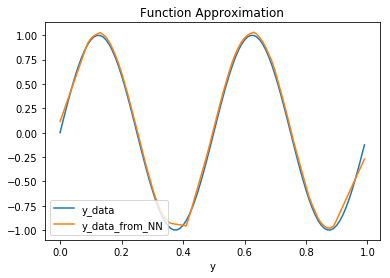

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#approximation property of neural network
x_data = np.ones([100, 1])
y_data = np.ones([100, 1])
for i in range(100) :
    x_data[i] = float(i) / 100.0
    y_data[i] = np.sin(4.0 * np.pi * x_data[i])


x_input_pc = tf.placeholder(tf.float32, shape=[None,1], name="x-input")
y_target_pc = tf.placeholder(tf.float32, shape=[None,1], name="y-input")

rand_uni = tf.random_uniform_initializer(-1e-1, 1e-1)
# build a graph
(1)


error = (y_target_pc - y_output)

cost = tf.reduce_mean(tf.multiply(error, error), name="cost")

# node of tensorflow
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.04).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)


#train
for i in range(10000):
    y_output_from_NN, cost_nn, _ = sess.run([y_output, cost, train_step], feed_dict={x_input_pc: x_data, y_target_pc: y_data})
    if i % 100 == 0:
        print("cost = ", cost_nn)

np.set_printoptions(precision=1)

#draw
plt.title("Function Approximation")
plt.xlabel('x')
plt.xlabel('y')

plt.plot(x_data, y_data, label = "y_data")
plt.plot(x_data, y_output_from_NN, label = "y_data_from_NN")

plt.legend()
plt.savefig('Function_Approximation.png', bbox_inches='tight', format='png', dpi=300, pad_inches=0,transparent=True)
plt.show()